# Классификация Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Набор данных по диагностике рака молочной железы в Висконсине

Количество наблюдений: 569

Количество характеристик: 30

In [2]:
df = pd.read_csv('d:\Projects\DeepLearning\DATA\cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Предварительный анализ данных

График распределения данных по результатам

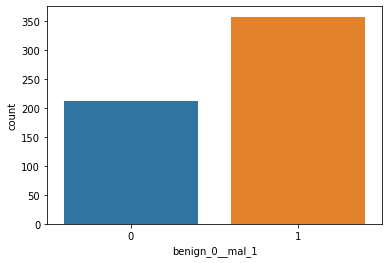

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

Посмотрим на корреляцию признаков

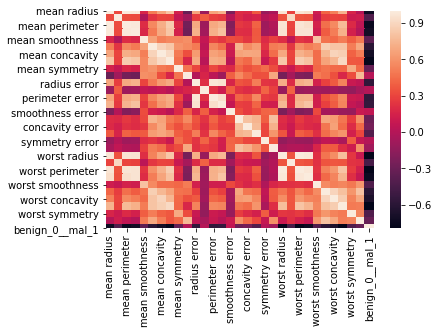

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

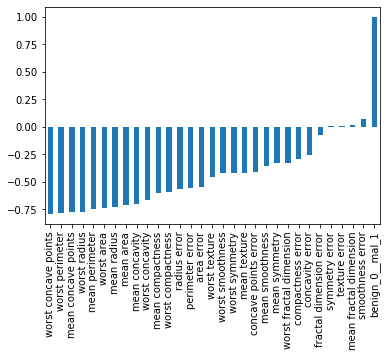

In [8]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

## Разделение данных

In [9]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Масштабирование данных

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Создание модели

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [17]:
X_train.shape

(426, 30)

In [18]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

## Обучение модели

#### Пример 1: Выбор большого количества эпох и переобучение модели

In [19]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6797 - val_loss: 0.6697
Epoch 2/600
426/426 [==============================] - 0s 54us/sample - loss: 0.6565 - val_loss: 0.6443
Epoch 3/600
426/426 [==============================] - 0s 49us/sample - loss: 0.6211 - val_loss: 0.6014
Epoch 4/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5736 - val_loss: 0.5526
Epoch 5/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5243 - val_loss: 0.4991
Epoch 6/600
426/426 [==============================] - 0s 49us/sample - loss: 0.4738 - val_loss: 0.4495
Epoch 7/600
426/426 [==============================] - 0s 45us/sample - loss: 0.4231 - val_loss: 0.3971
Epoch 8/600
426/426 [==============================] - 0s 45us/sample - loss: 0.3759 - val_loss: 0.3506
Epoch 9/600
426/426 [==============================] - 0s 47us/sample - loss: 0.3343 - val_loss: 0.3089
Epoch 10/600
426/42

426/426 [==============================] - 0s 47us/sample - loss: 0.0554 - val_loss: 0.1076
Epoch 79/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0540 - val_loss: 0.1136
Epoch 80/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0529 - val_loss: 0.1044
Epoch 81/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0549 - val_loss: 0.1131
Epoch 82/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0578 - val_loss: 0.1061
Epoch 83/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0590 - val_loss: 0.1104
Epoch 84/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0528 - val_loss: 0.1090
Epoch 85/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0546 - val_loss: 0.1046
Epoch 86/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0534 - val_loss: 0.1177
Epoch 87/600
426/426 [==============================] - 0s 47us/samp

426/426 [==============================] - 0s 49us/sample - loss: 0.0465 - val_loss: 0.1236
Epoch 156/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0455 - val_loss: 0.1202
Epoch 157/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0494 - val_loss: 0.1219
Epoch 158/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0642 - val_loss: 0.1136
Epoch 159/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0593 - val_loss: 0.1392
Epoch 160/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0495 - val_loss: 0.1154
Epoch 161/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0466 - val_loss: 0.1331
Epoch 162/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0474 - val_loss: 0.1171
Epoch 163/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0458 - val_loss: 0.1254
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 47us/sample - loss: 0.0409 - val_loss: 0.1337
Epoch 233/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0393 - val_loss: 0.1342
Epoch 234/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0414 - val_loss: 0.1432
Epoch 235/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0439 - val_loss: 0.1274
Epoch 236/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0427 - val_loss: 0.1281
Epoch 237/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0418 - val_loss: 0.1347
Epoch 238/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0396 - val_loss: 0.1288
Epoch 239/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0403 - val_loss: 0.1378
Epoch 240/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0390 - val_loss: 0.1219
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 49us/sample - loss: 0.0365 - val_loss: 0.1555
Epoch 310/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0332 - val_loss: 0.1310
Epoch 311/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0357 - val_loss: 0.1425
Epoch 312/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0344 - val_loss: 0.1429
Epoch 313/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0358 - val_loss: 0.1436
Epoch 314/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0352 - val_loss: 0.1524
Epoch 315/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0371 - val_loss: 0.1598
Epoch 316/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0358 - val_loss: 0.1401
Epoch 317/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0361 - val_loss: 0.1347
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 45us/sample - loss: 0.0308 - val_loss: 0.1432
Epoch 387/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0295 - val_loss: 0.1434
Epoch 388/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0299 - val_loss: 0.1439
Epoch 389/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0310 - val_loss: 0.1446
Epoch 390/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0292 - val_loss: 0.1497
Epoch 391/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0298 - val_loss: 0.1481
Epoch 392/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0295 - val_loss: 0.1526
Epoch 393/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0295 - val_loss: 0.1427
Epoch 394/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0311 - val_loss: 0.1544
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 47us/sample - loss: 0.0316 - val_loss: 0.1464
Epoch 464/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0306 - val_loss: 0.1657
Epoch 465/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0290 - val_loss: 0.1619
Epoch 466/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0249 - val_loss: 0.1387
Epoch 467/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0293 - val_loss: 0.1918
Epoch 468/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0270 - val_loss: 0.1395
Epoch 469/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0266 - val_loss: 0.1642
Epoch 470/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0324 - val_loss: 0.1545
Epoch 471/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0260 - val_loss: 0.1611
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 47us/sample - loss: 0.0220 - val_loss: 0.1819
Epoch 541/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0252 - val_loss: 0.1456
Epoch 542/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0243 - val_loss: 0.1772
Epoch 543/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0242 - val_loss: 0.1611
Epoch 544/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0225 - val_loss: 0.1588
Epoch 545/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0232 - val_loss: 0.1662
Epoch 546/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0245 - val_loss: 0.1634
Epoch 547/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0230 - val_loss: 0.1542
Epoch 548/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0235 - val_loss: 0.1705
Epoch 549/600
426/426 [==============================] - 0s 

In [20]:
model_loss = pd.DataFrame(model.history.history)

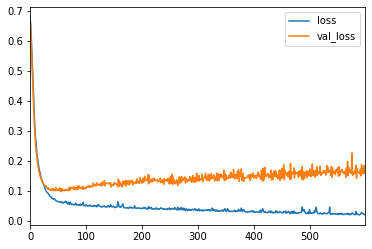

In [21]:
model_loss.plot()

Так выглядит переобученная на тренировочных данных модель

#### Пример 2: Ранняя остановка

In [22]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [25]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6698 - val_loss: 0.6440
Epoch 2/600
426/426 [==============================] - 0s 47us/sample - loss: 0.6332 - val_loss: 0.6098
Epoch 3/600
426/426 [==============================] - 0s 52us/sample - loss: 0.5956 - val_loss: 0.5715
Epoch 4/600
426/426 [==============================] - 0s 49us/sample - loss: 0.5559 - val_loss: 0.5284
Epoch 5/600
426/426 [==============================] - 0s 47us/sample - loss: 0.5103 - val_loss: 0.4794
Epoch 6/600
426/426 [==============================] - 0s 47us/sample - loss: 0.4622 - val_loss: 0.4327
Epoch 7/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4165 - val_loss: 0.3869
Epoch 8/600
426/426 [==============================] - 0s 49us/sample - loss: 0.3744 - val_loss: 0.3442
Epoch 9/600
426/426 [==============================] - 0s 47us/sample - loss: 0.3345 - val_loss: 0.3067
Epoch 10/600
426/42

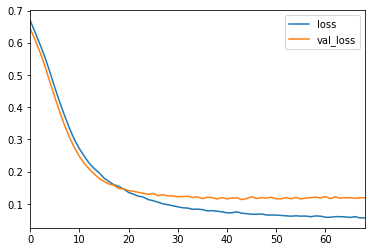

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

#### Пример 3: Добавление в DropOut Layers

In [28]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Оценка модели

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [30]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6966 - val_loss: 0.6692
Epoch 2/600
426/426 [==============================] - 0s 54us/sample - loss: 0.6763 - val_loss: 0.6535
Epoch 3/600
426/426 [==============================] - 0s 49us/sample - loss: 0.6742 - val_loss: 0.6379
Epoch 4/600
426/426 [==============================] - 0s 54us/sample - loss: 0.6498 - val_loss: 0.6185
Epoch 5/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6336 - val_loss: 0.5974
Epoch 6/600
426/426 [==============================] - 0s 49us/sample - loss: 0.6140 - val_loss: 0.5761
Epoch 7/600
426/426 [==============================] - 0s 52us/sample - loss: 0.5872 - val_loss: 0.5514
Epoch 8/600
426/426 [==============================] - 0s 49us/sample - loss: 0.5612 - val_loss: 0.5244
Epoch 9/600
426/426 [==============================] - 0s 49us/sample - loss: 0.5644 - val_loss: 0.4948
Epoch 10/600
426/42

426/426 [==============================] - 0s 49us/sample - loss: 0.1260 - val_loss: 0.0960
Epoch 79/600
426/426 [==============================] - 0s 47us/sample - loss: 0.1426 - val_loss: 0.1038
Epoch 80/600
426/426 [==============================] - 0s 49us/sample - loss: 0.1374 - val_loss: 0.1013
Epoch 81/600
426/426 [==============================] - 0s 47us/sample - loss: 0.1130 - val_loss: 0.0903
Epoch 82/600
426/426 [==============================] - 0s 49us/sample - loss: 0.1346 - val_loss: 0.1033
Epoch 83/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1151 - val_loss: 0.0918
Epoch 84/600
426/426 [==============================] - 0s 47us/sample - loss: 0.1363 - val_loss: 0.0948
Epoch 85/600
426/426 [==============================] - 0s 49us/sample - loss: 0.1261 - val_loss: 0.1044
Epoch 86/600
426/426 [==============================] - 0s 52us/sample - loss: 0.1185 - val_loss: 0.1149
Epoch 87/600
426/426 [==============================] - 0s 49us/samp

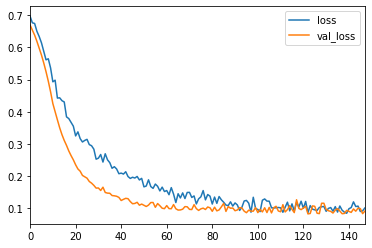

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Оценка модели

In [32]:
predictions = model.predict_classes(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [37]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
